In [23]:
%run lucas-lehmer.ipynb
%run shors.ipynb
%run integer-mult.ipynb
%run rsa.ipynb

import time
import matplotlib.pyplot as plt


Success!
[3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127, 521, 607, 1279, 2203, 2281]
3
4
5
6
1 7 0.0008833408355712891
3
23 45 0.2682502269744873
6170 6170

0 500
0 0

0 239
0 0

0 5938283912
0 0

1 500
500 500

1 239
239 239

1 5938283912
5938283912 5938283912

500 500
250000 250000

500 239
119500 119500

500 5938283912
2969141956000 2969141956000

2320 500
1160000 1160000

2320 239
554480 554480

2320 5938283912
13776818675840 13776818675840

19234238 500
9617119000 9617119000

19234238 239
4596982882 4596982882

19234238 5938283912
114218366074979056 114218366074979056
Hello, world!


# Lucas Lehmer Test


The Lucas Lehmer test is a primality test for a specific form of numbers (numbers which are 1 less than a power of 2). It runs faster than many other primality tests for these numbers, but does not give the specific factors as a result (so it is not a factoring algorithm)


# Algorithm

Definitions:

$ M_p = 2^{p} - 1, p \in \mathbb{P} \& p > 2 $

$ L_{i+1} = L_{i} ^ 2 - 2, L_0 = 4$


$ M_p $ is prime if $ p $ is prime, and $ L_{p-2} = 0$ (mod $M_p$)


Otherwise, $ M_p $ is composite. Additionally, each $ L_i $ can be reduced modulo $M_p$ to keep intermediate results a reasonable size.

This algorithm is a good example of a fast primality test for classical computers, and has been used to find the world records for largest primes for the last 20 years.




Mersenne Exponents: [3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127, 521, 607, 1279, 2203, 2281]


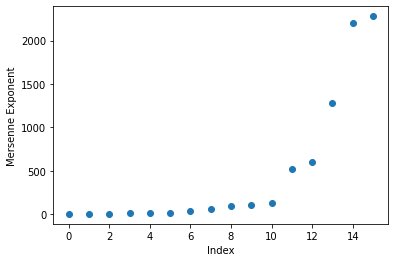

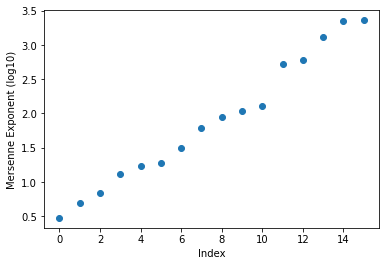

In [21]:


# example exponents which mersenne numbers are prime
M_exps = list(filter(LLtest, range(3, 3000, 2)))
print ("Mersenne Exponents:", M_exps)


# plot the exponents on a chart
plt.scatter(range(len(M_exps)), M_exps)
plt.xlabel('Index')
plt.ylabel('Mersenne Exponent')

plt.show()

# now, plot on a log scale

plt.scatter(range(len(M_exps)), np.log10(M_exps))
plt.xlabel('Index')
plt.ylabel('Mersenne Exponent (log10)')

plt.show()


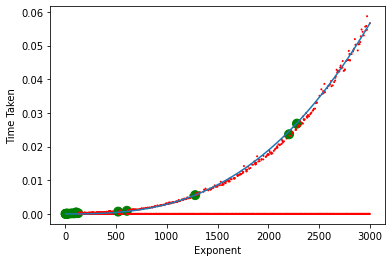

In [60]:

# plotting runtimes for the test
# NOTE: There may be some shortcuts (like if the exponent is not prime),
#   so some runtimes will be close to 0

# create arrays for the results
exps = range(3, 3000, 2)
is_prime = []
times = []

for p in exps:
    st = time.time()
    is_prime += [LLtest(p)]
    times += [time.time() - st]
    
    
# now, plot times
# array of exponents
aE = np.array(exps)
# approximate fit: O(n^2 * log(n))
# in reaity, Python's big integer library uses less-than-optimal multiplication,
#   so the measured times are faster
# realy the complexity is O(n * log(n) * Mult(n)), where Mult(n) is the multiplication complexity
# Since Python uses karatsuba, Mult(n) = n^1.58
# So, the real O is O(n^2.58 * log(n))

# simple interpolation coefficient
alpha = times[-1] / (aE[-1] ** 2.58 * np.log(aE[-1]))
plt.plot(exps, alpha * aE ** 2.58 * np.log(aE))


# scatter plot the actual times
plt.scatter(exps, times, s=[80 if iP else 1 for iP in is_prime], color=['green' if iP else 'red' for iP in is_prime])
plt.xlabel('Exponent')
plt.ylabel('Time Taken')

plt.show()

    
